<a href="https://colab.research.google.com/github/JQ100/project2/blob/main/project2part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [110]:
df = pd.read_csv('/content/superstore - superstore.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [111]:
# drop columns
df = df.drop(['Row ID', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Profit', 'Product ID', 'Product Name', 'Sub-Category', 'Customer ID', 'Customer Name', 'Order ID', 'Order Date'], axis=1)
df.head()

,Category,Sales,Quantity,Discount
0,Furniture,261.9600,2,0.00
1,Furniture,731.9400,3,0.00
2,Office Supplies,14.6200,2,0.00
3,Furniture,957.5775,5,0.45
4,Office Supplies,22.3680,2,0.20


In [112]:
df['Category'].value_counts()
# Encoding 'Category'
replacement_dictionary = {'Office Supplies':0, 'Furniture':1, 'Technology':2}
df['Category'].replace(replacement_dictionary, inplace=True)
df['Category'].value_counts()

0    6026
1    2121
2    1847
Name: Category, dtype: int64

In [113]:
# use regression because our target variable sales is continuous
# Model 1 - Regression Tree
le = LabelEncoder()
y = le.fit_transform(df['Sales'])
X = df.drop(columns = 'Sales')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [114]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

# evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.4097664352579098
0.3968714482126493


In [115]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [116]:
# finding the optimal max_depth - hyperparameter tuning
# List of values to try for max_depth:
depths = list(range(2, 36)) # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_test, y_test)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

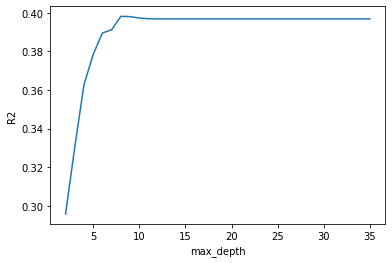

In [117]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [118]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
8,0.398197,0.398197
9,0.398044,0.398044
10,0.3973,0.3973
11,0.396941,0.396941
12,0.396885,0.396885


In [119]:
# Let's run the model with our optimized value for max_depth
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train, y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)
print(train_6_score)
print(test_6_score)

0.3901825642507575
0.3895574003853507


In [120]:
# Model 2 - Random Forest Tree
rf = RandomForestRegressor(random_state = 42)
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [121]:
rf.fit(X_train, y_train)
rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.4093015131151573
0.39780332048428746


In [122]:
# finding best max_depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

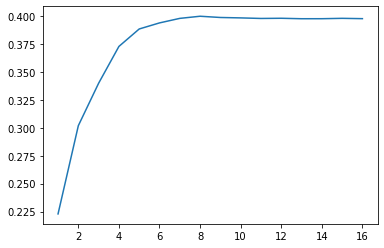

In [123]:
plt.plot(scores['Test Score'])

In [124]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
8,0.400107,0.407081
9,0.398993,0.408449
10,0.398627,0.409021
12,0.398288,0.409323
15,0.398232,0.409264


In [125]:
# At max_depth = 5
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_5.fit(X_train, y_train)
rf_5_train_score = rf_5.score(X_train, y_train)
rf_5_test_score = rf_5.score(X_test, y_test)
print(rf_5_train_score)
print(rf_5_test_score)

0.3885137239303301
0.3882236399051089


In [126]:
# let's also tune n_estimators
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=29, n_estimators=n)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
50,0.39838,0.409143
100,0.397715,0.409277
150,0.397681,0.409332
200,0.398152,0.409331
250,0.397866,0.409339


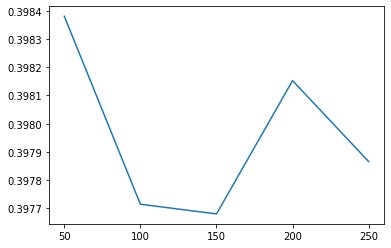

In [127]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [128]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
50,0.39838,0.409143
200,0.398152,0.409331
250,0.397866,0.409339
100,0.397715,0.409277
150,0.397681,0.409332


By tweaking the max_depth parameter in our decision tree model, we were able to bring our training and test results higher. And in our random forest model, doing so allows us to bring the training and testing scores closer together, a sign we have reduced overfitting. We also tweaked the number of estimators, from which we hardly notice any improvement. 

In [129]:
# Feature Engineering - Overloaded Operators
# We're going to multiply Sales * Quantity
df['SalesQuantity'] = df['Sales'] * df['Quantity'].astype('float')
df.head()

,Category,Sales,Quantity,Discount,SalesQuantity
0,1,261.9600,2,0.00,523.9200
1,1,731.9400,3,0.00,2195.8200
2,0,14.6200,2,0.00,29.2400
3,1,957.5775,5,0.45,4787.8875
4,0,22.3680,2,0.20,44.7360


In [130]:
# Let's see if feature engineering influences our models.
# Model 1 - Regression Tree
# use regression because our target variable sales is continuous
le = LabelEncoder()
y = le.fit_transform(df['Sales'])
X = df.drop(columns = 'Sales')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [131]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

# evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.9998624214354795


In [132]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [133]:
# finding the optimal max_depth - hyperparameter tuning
# List of values to try for max_depth:
depths = list(range(2, 36)) # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_test, y_test)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

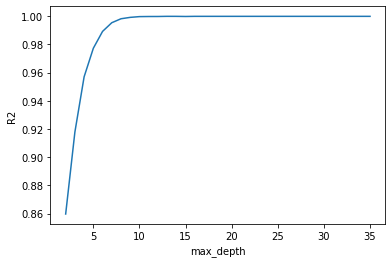

In [134]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [135]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
13,0.999867,0.999867
17,0.999863,0.999863
19,0.999862,0.999862
20,0.999862,0.999862
22,0.999862,0.999862


In [136]:
# Let's run the model with our optimized value for max_depth
dec_tree_13 = DecisionTreeRegressor(max_depth = 13, random_state = 42)
dec_tree_13.fit(X_train, y_train)
train_13_score = dec_tree_13.score(X_train, y_train)
test_13_score = dec_tree_13.score(X_test, y_test)
print(train_13_score)
print(test_13_score)

0.9999983261447337
0.9998665573116442


Before we re-evaluate our second model, we can see there is a dramatic change after the feature engineering step to our regression tree model.At the new max depth of 13, the train and test scores are close together, which is a good sign.

In [137]:
# Model 2 - Random Forest Tree
rf = RandomForestRegressor(random_state = 42)
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [138]:
rf.fit(X_train, y_train)
rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9999838239451507
0.9999202064980957


In [139]:
# finding best max_depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

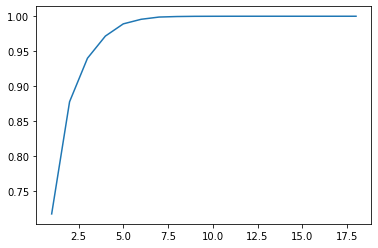

In [140]:
plt.plot(scores['Test Score'])

In [141]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
13,0.999925,0.999983
12,0.999925,0.999983
18,0.999925,0.999985
15,0.999922,0.999984
17,0.999922,0.999984


In [142]:
# At max_depth = 12
rf_12 = RandomForestRegressor(max_depth = 12, random_state = 42)
rf_12.fit(X_train, y_train)
rf_12_train_score = rf_12.score(X_train, y_train)
rf_12_test_score = rf_12.score(X_test, y_test)
print(rf_12_train_score)
print(rf_12_test_score)

0.9999816969524433
0.9999188537828911


In [106]:
# let's also tune n_estimators
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestRegressor(max_depth=29, n_estimators=n)
   model.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
50,0.999908,0.999983
100,0.999927,0.999984
150,0.999922,0.999985
200,0.999919,0.999984
250,0.999927,0.999985


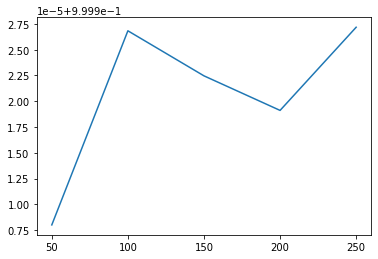

In [107]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [108]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

,Test Score,Train Score
250,0.999927,0.999985
100,0.999927,0.999984
150,0.999922,0.999985
200,0.999919,0.999984
50,0.999908,0.999983


After our feature engineering step, we can see our training and test data have moved even closer, and both scores regardless of model are much closer to 1.

I choose the post-feature engineering decision tree as my production model because the training and test scores are very close together and lean towards 1. The chart also looks stable.